In [1]:
#Import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import warnings

In [7]:
df= pd.read_csv("train.csv")
df

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,sadness,1.000000
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,world/life,1.000000
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,music,1.000000
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,romantic,1.000000
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,romantic,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,82447,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,78,0.001350,0.001350,0.001350,...,0.001350,0.391651,0.001350,0.435089,0.001350,0.001350,0.065664,0.001350,obscene,0.014286
28358,82448,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,67,0.001284,0.001284,0.035338,...,0.203889,0.318910,0.058152,0.134955,0.001284,0.001284,0.001284,0.001284,obscene,0.014286
28359,82449,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,77,0.001504,0.154302,0.168988,...,0.001504,0.356685,0.001504,0.068684,0.001504,0.001504,0.001504,0.001504,obscene,0.014286
28360,82450,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,67,0.001196,0.001196,0.001196,...,0.001196,0.492434,0.103614,0.001196,0.202659,0.001196,0.001196,0.001196,obscene,0.014286


In [8]:
df.shape

(28362, 24)

In [9]:
df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,romantic,1.0


In [10]:
df.describe()

,Unnamed: 0,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
count,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000
mean,42948.166878,1990.239652,73.030534,0.021110,0.118371,0.120984,0.057356,0.017418,0.017045,0.048676,0.076651,0.097185,0.060067,0.047417,0.049008,0.024155,0.129402,0.030995,0.425148
std,24747.811462,18.486997,41.831605,0.052366,0.178658,0.172216,0.111892,0.040658,0.041968,0.106071,0.109497,0.181314,0.123346,0.091559,0.089553,0.051032,0.181149,0.071656,0.264100
min,0.000000,1950.000000,1.000000,0.000291,0.000284,0.000291,0.000289,0.000284,0.000289,0.000284,0.000291,0.000289,0.000289,0.000284,0.000284,0.000284,0.000284,0.000289,0.014286
25%,20393.500000,1975.000000,42.000000,0.000923,0.001120,0.001170,0.001032,0.000993,0.000923,0.000975,0.001144,0.001053,0.000975,0.000993,0.000993,0.000957,0.001144,0.000993,0.185714
50%,45407.000000,1991.000000,63.000000,0.001462,0.002506,0.006579,0.001949,0.001595,0.001504,0.001754,0.002632,0.001815,0.001815,0.001645,0.001815,0.001645,0.005263,0.001754,0.414286
75%,64089.500000,2007.000000,93.000000,0.004049,0.192538,0.197854,0.065778,0.009989,0.004785,0.042304,0.132111,0.088799,0.055109,0.054373,0.064302,0.025515,0.235115,0.032617,0.642857
max,82451.000000,2019.000000,199.000000,0.647706,0.981781,0.962105,0.973684,0.497463,0.545303,0.940789,0.645829,0.992298,0.956938,0.638021,0.667782,0.618073,0.981424,0.958810,1.000000


/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


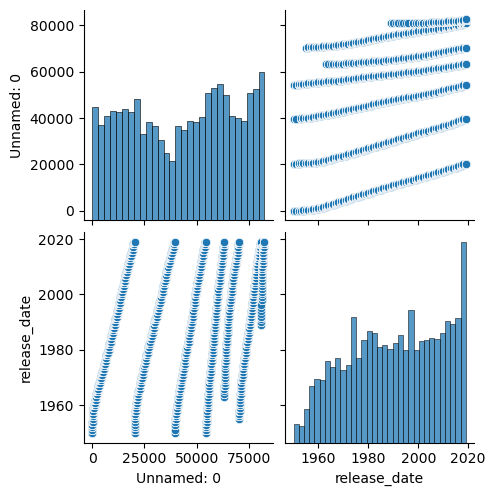

In [11]:
sns.pairplot(df.iloc[:,:5])

/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


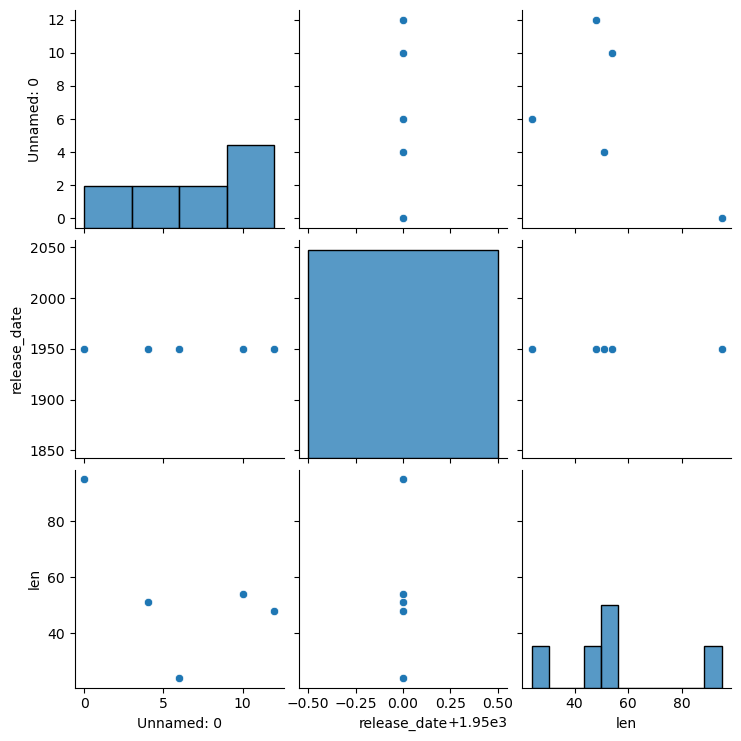

In [12]:
sns.pairplot(df.iloc[:5,:7])

/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


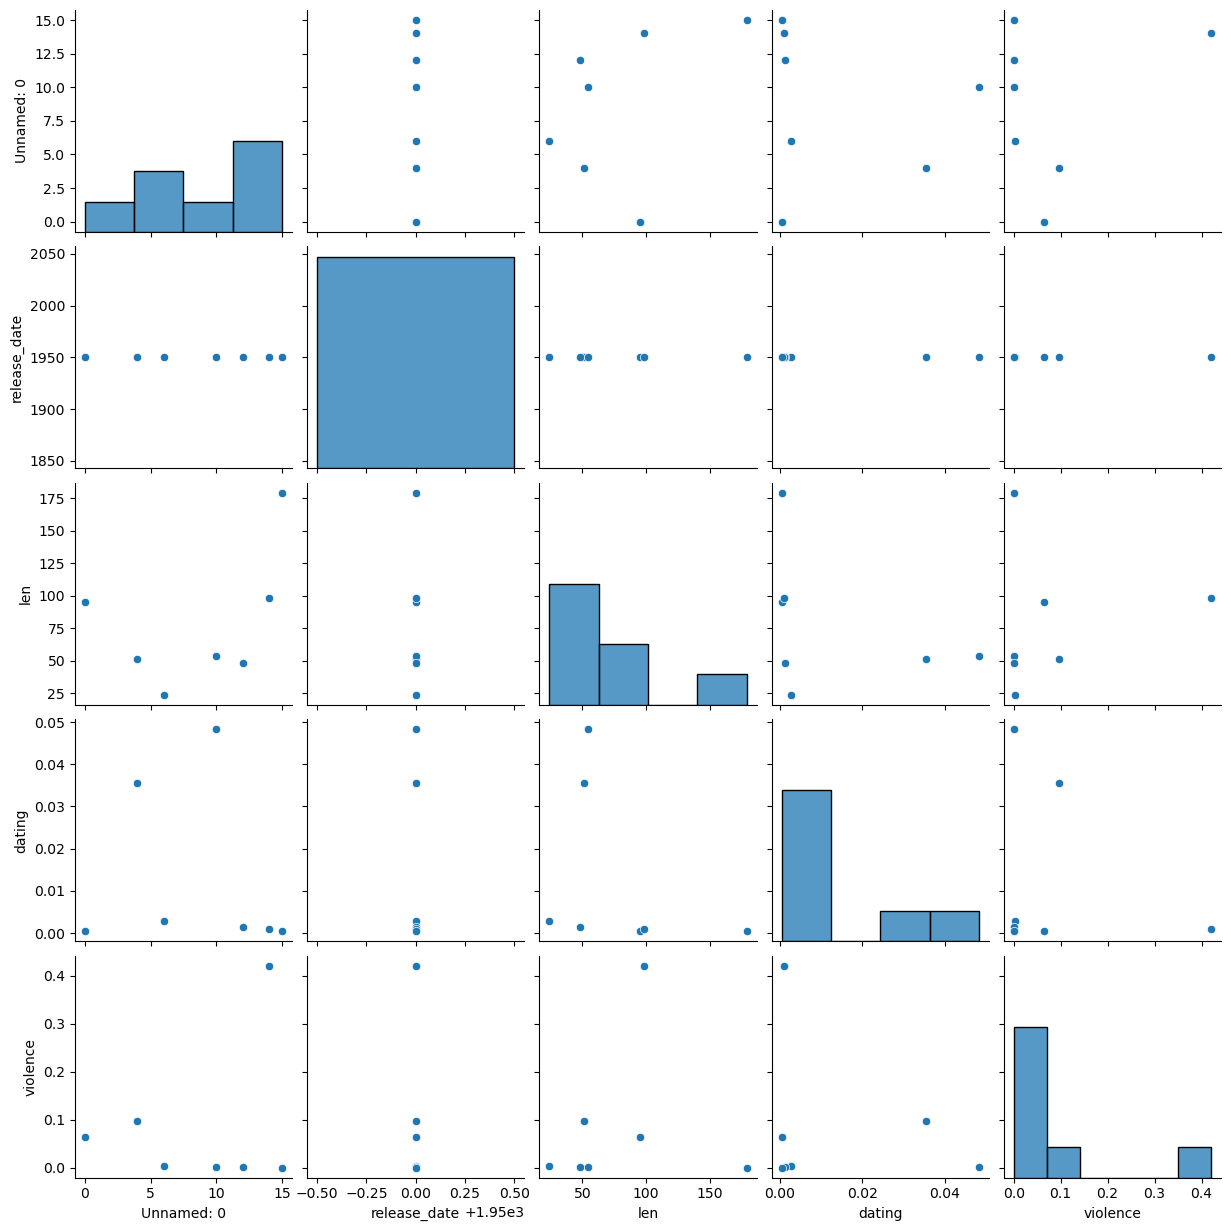

In [13]:
sns.pairplot(df.iloc[:7,:9])

/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


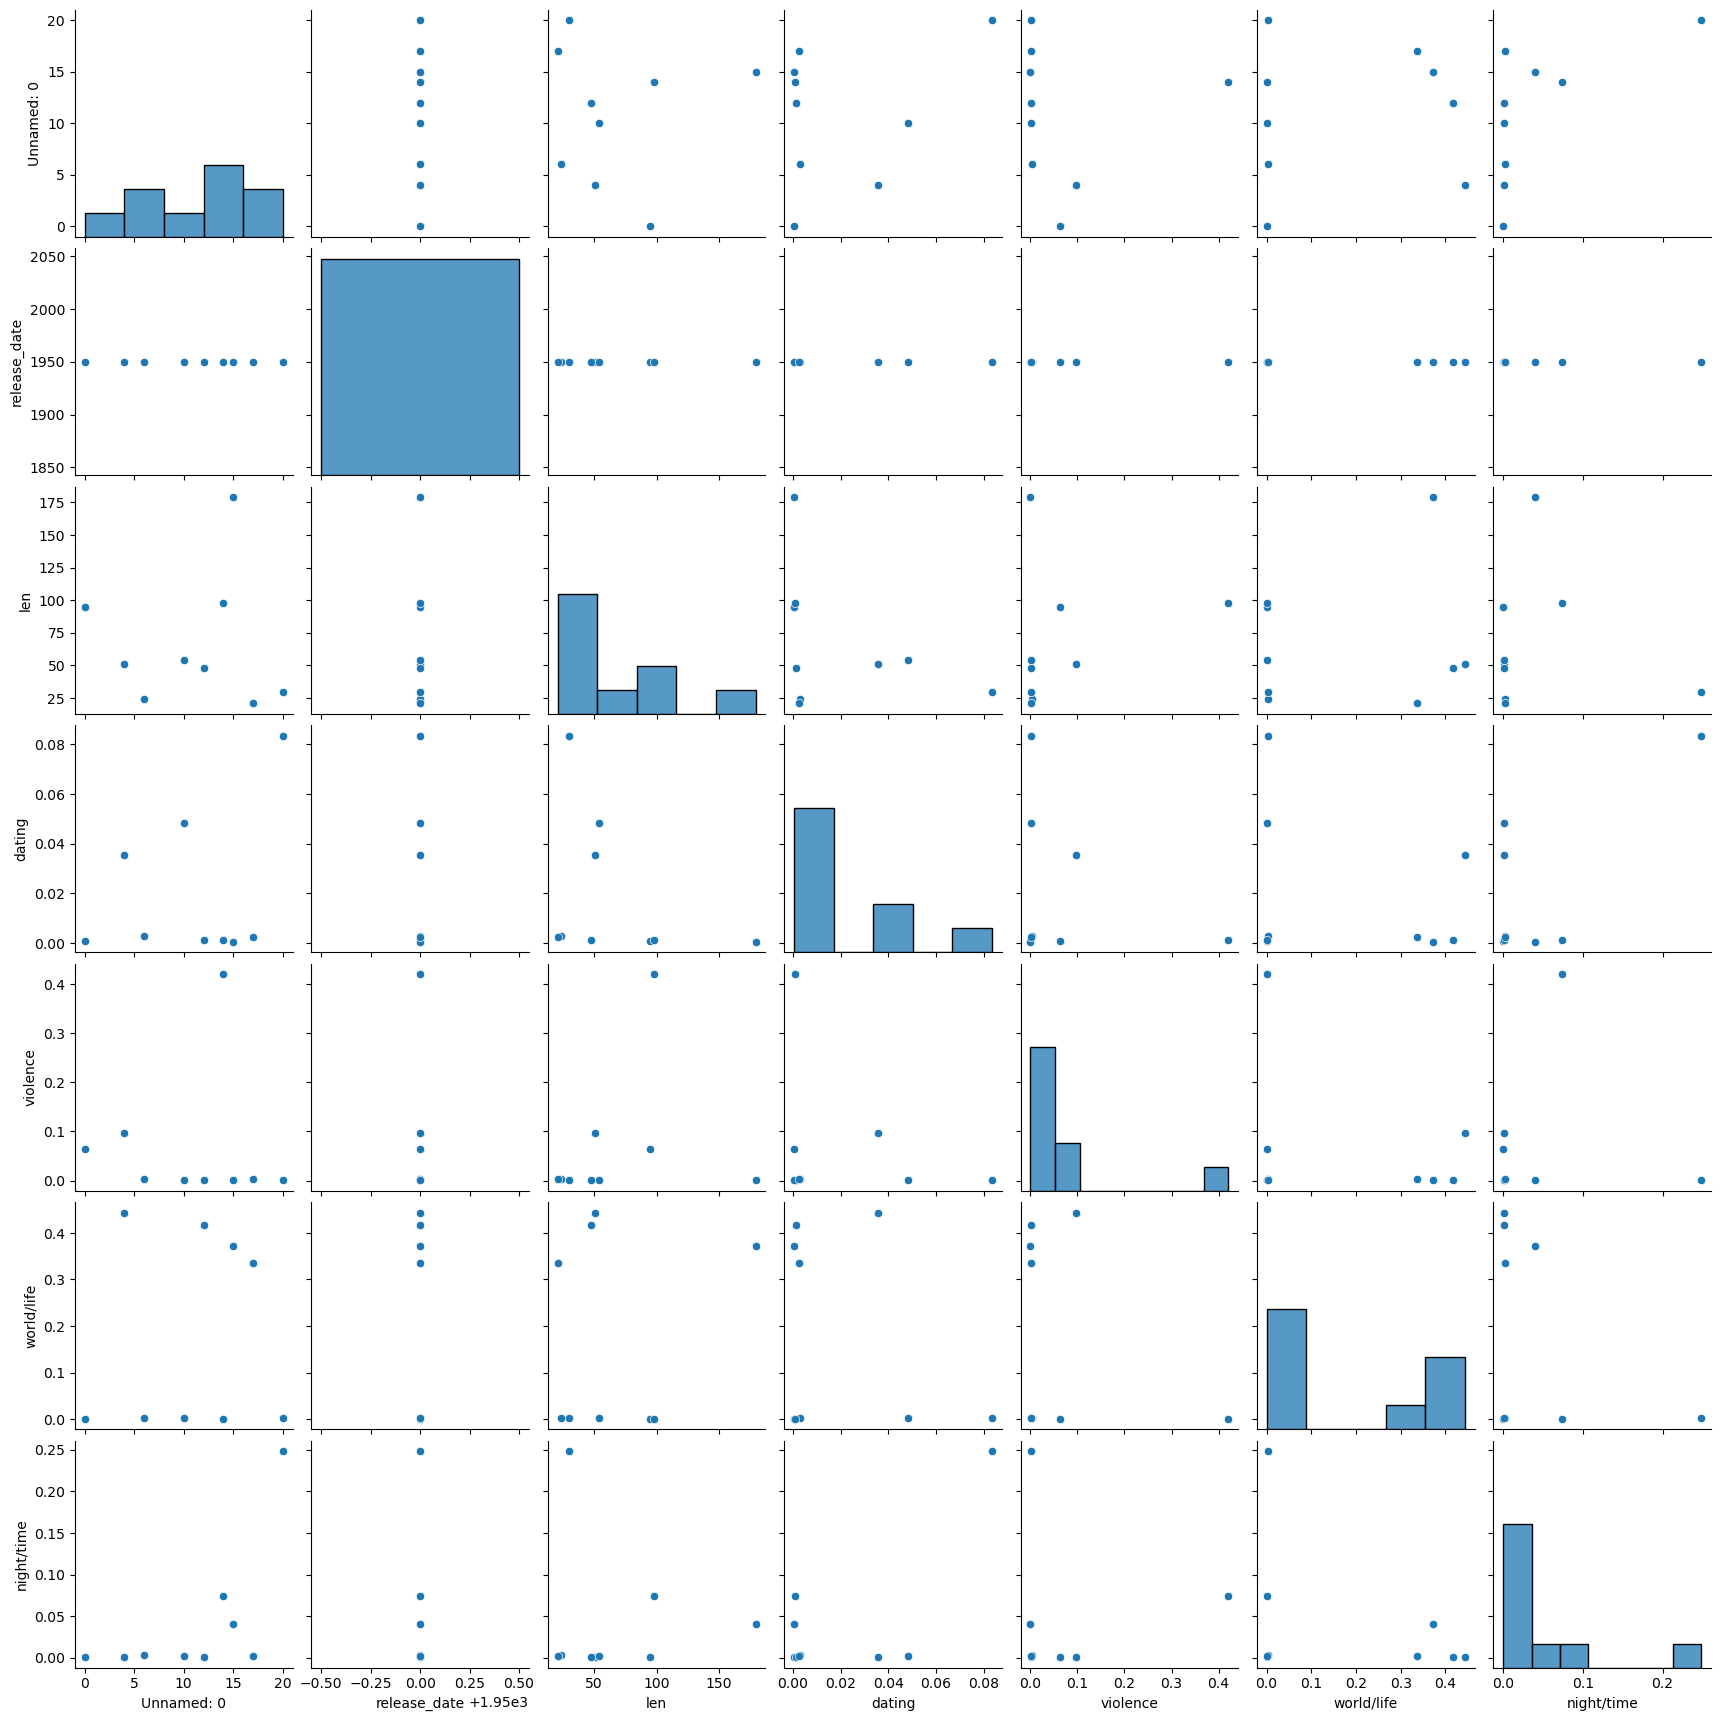

In [14]:
sns.pairplot(df.iloc[:9,:11])

/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


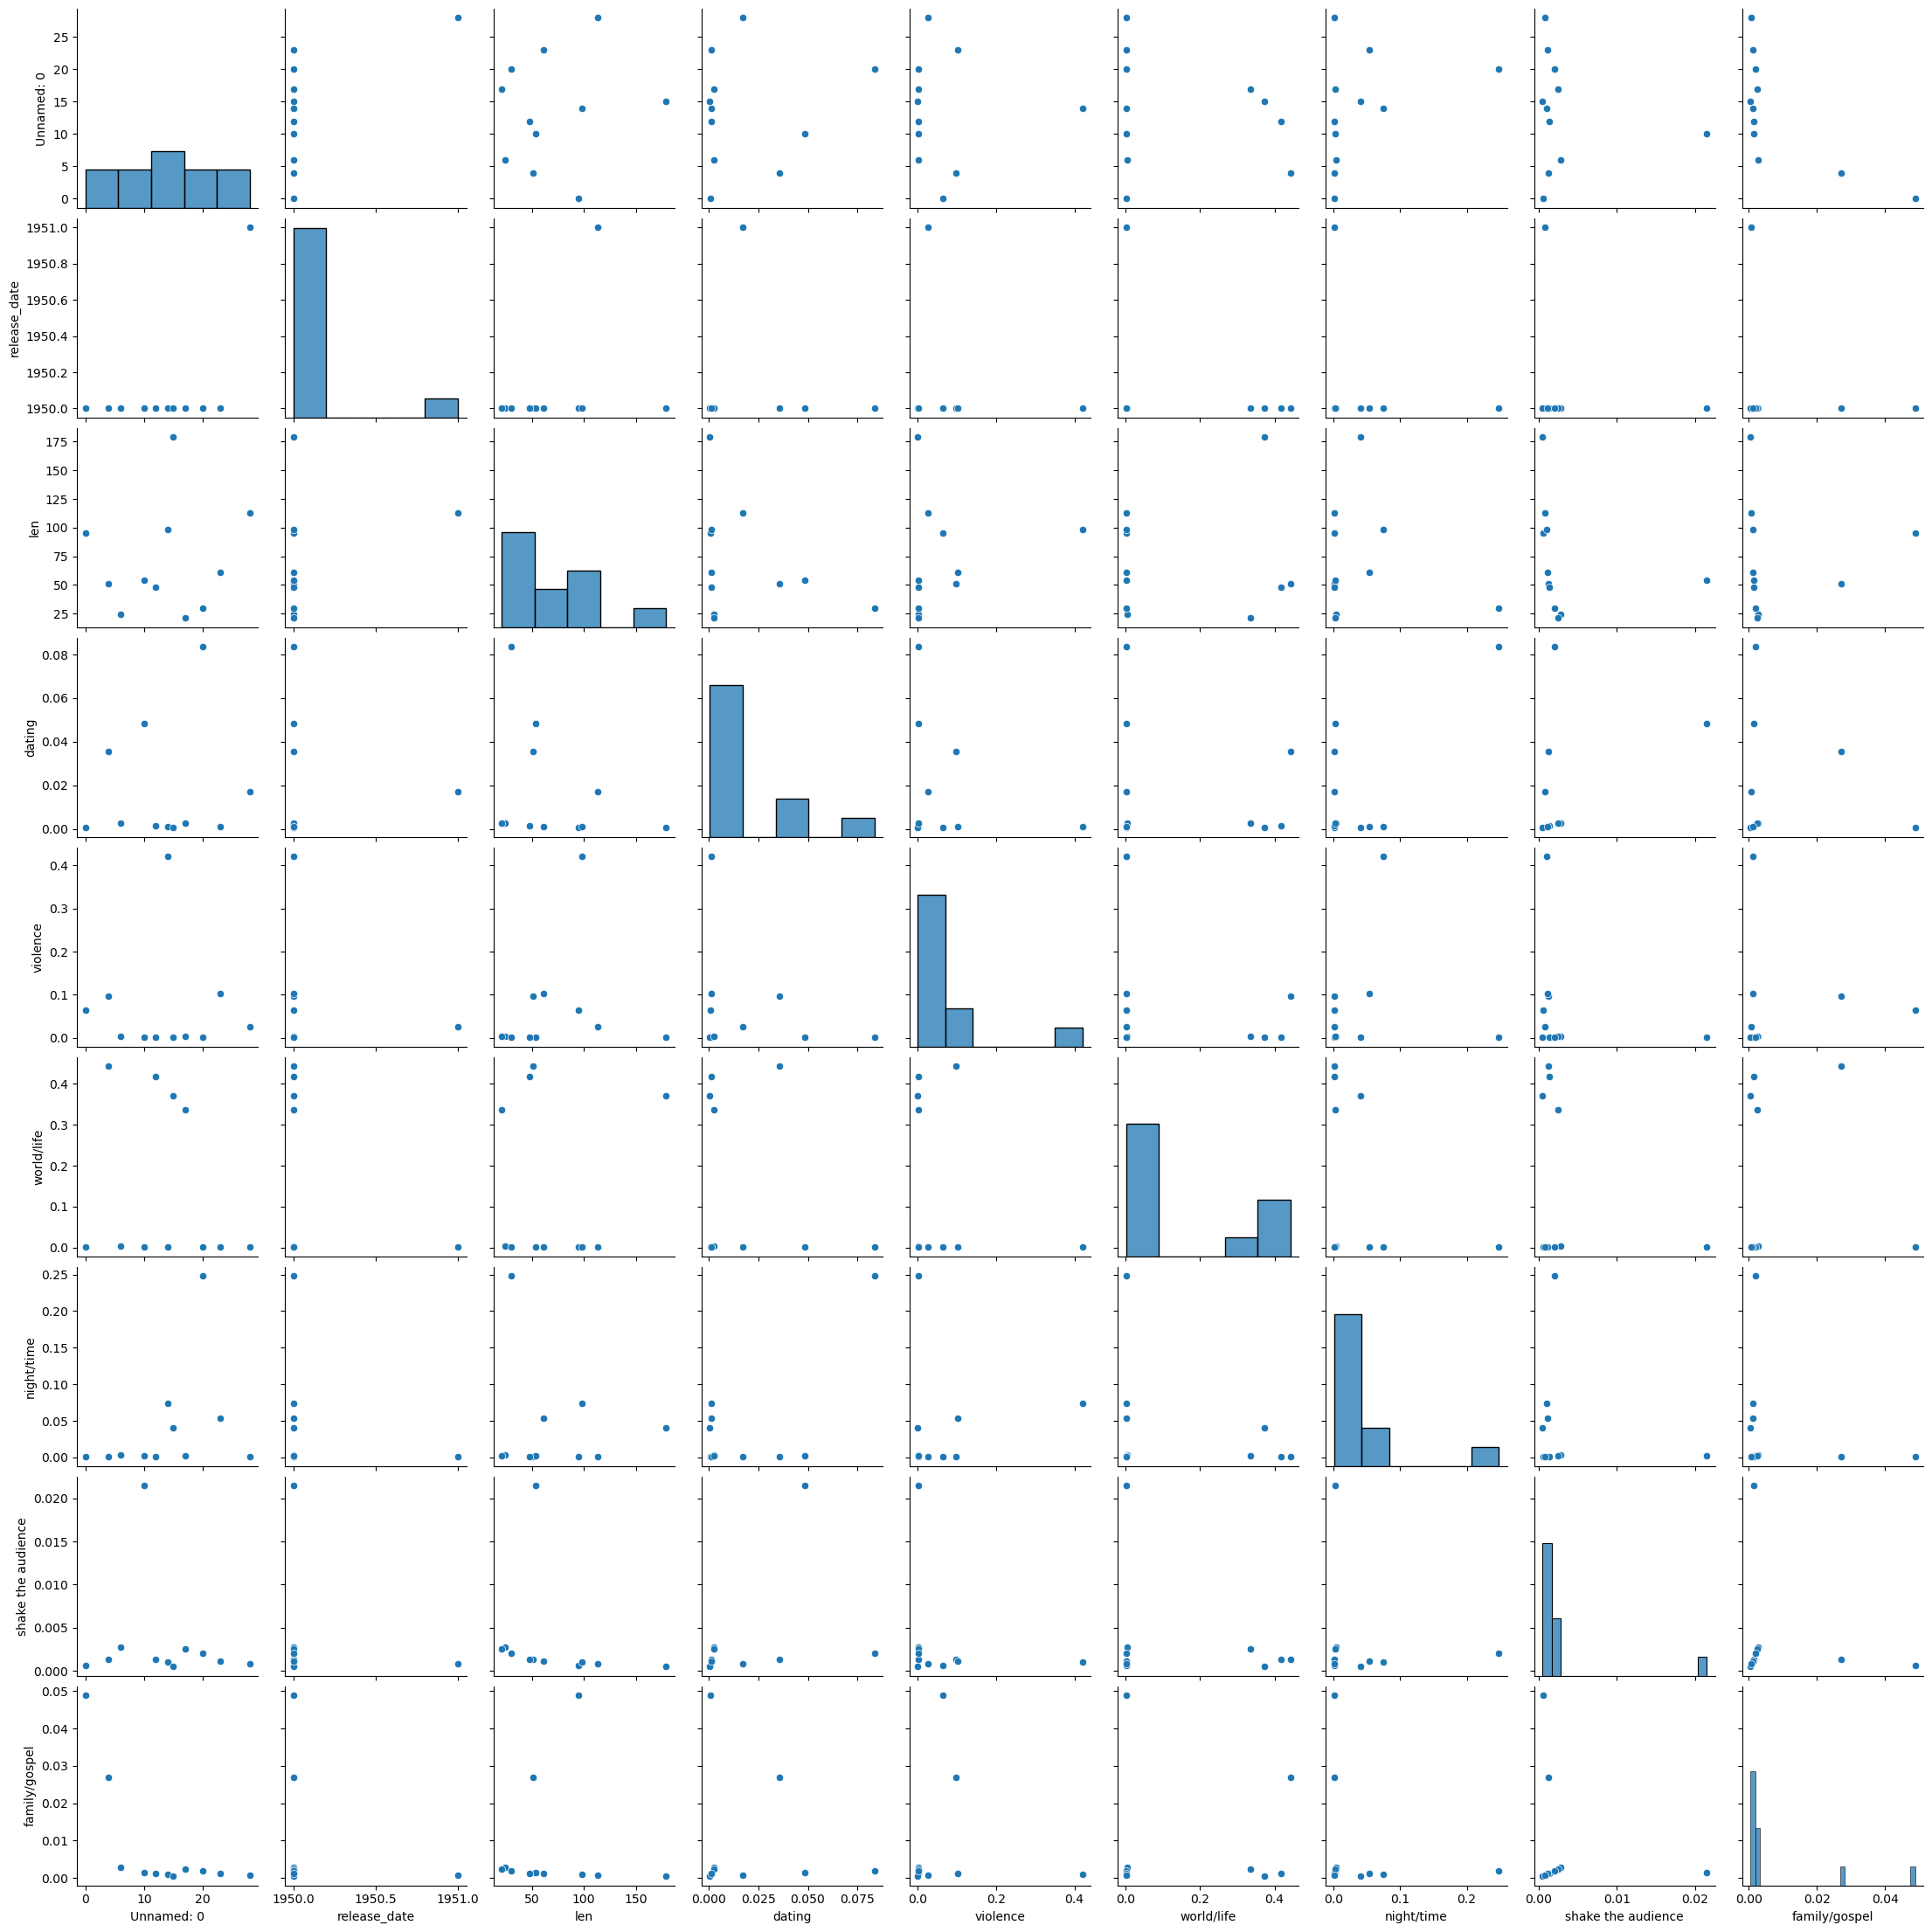

In [15]:
sns.pairplot(df.iloc[:11,:13])

/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


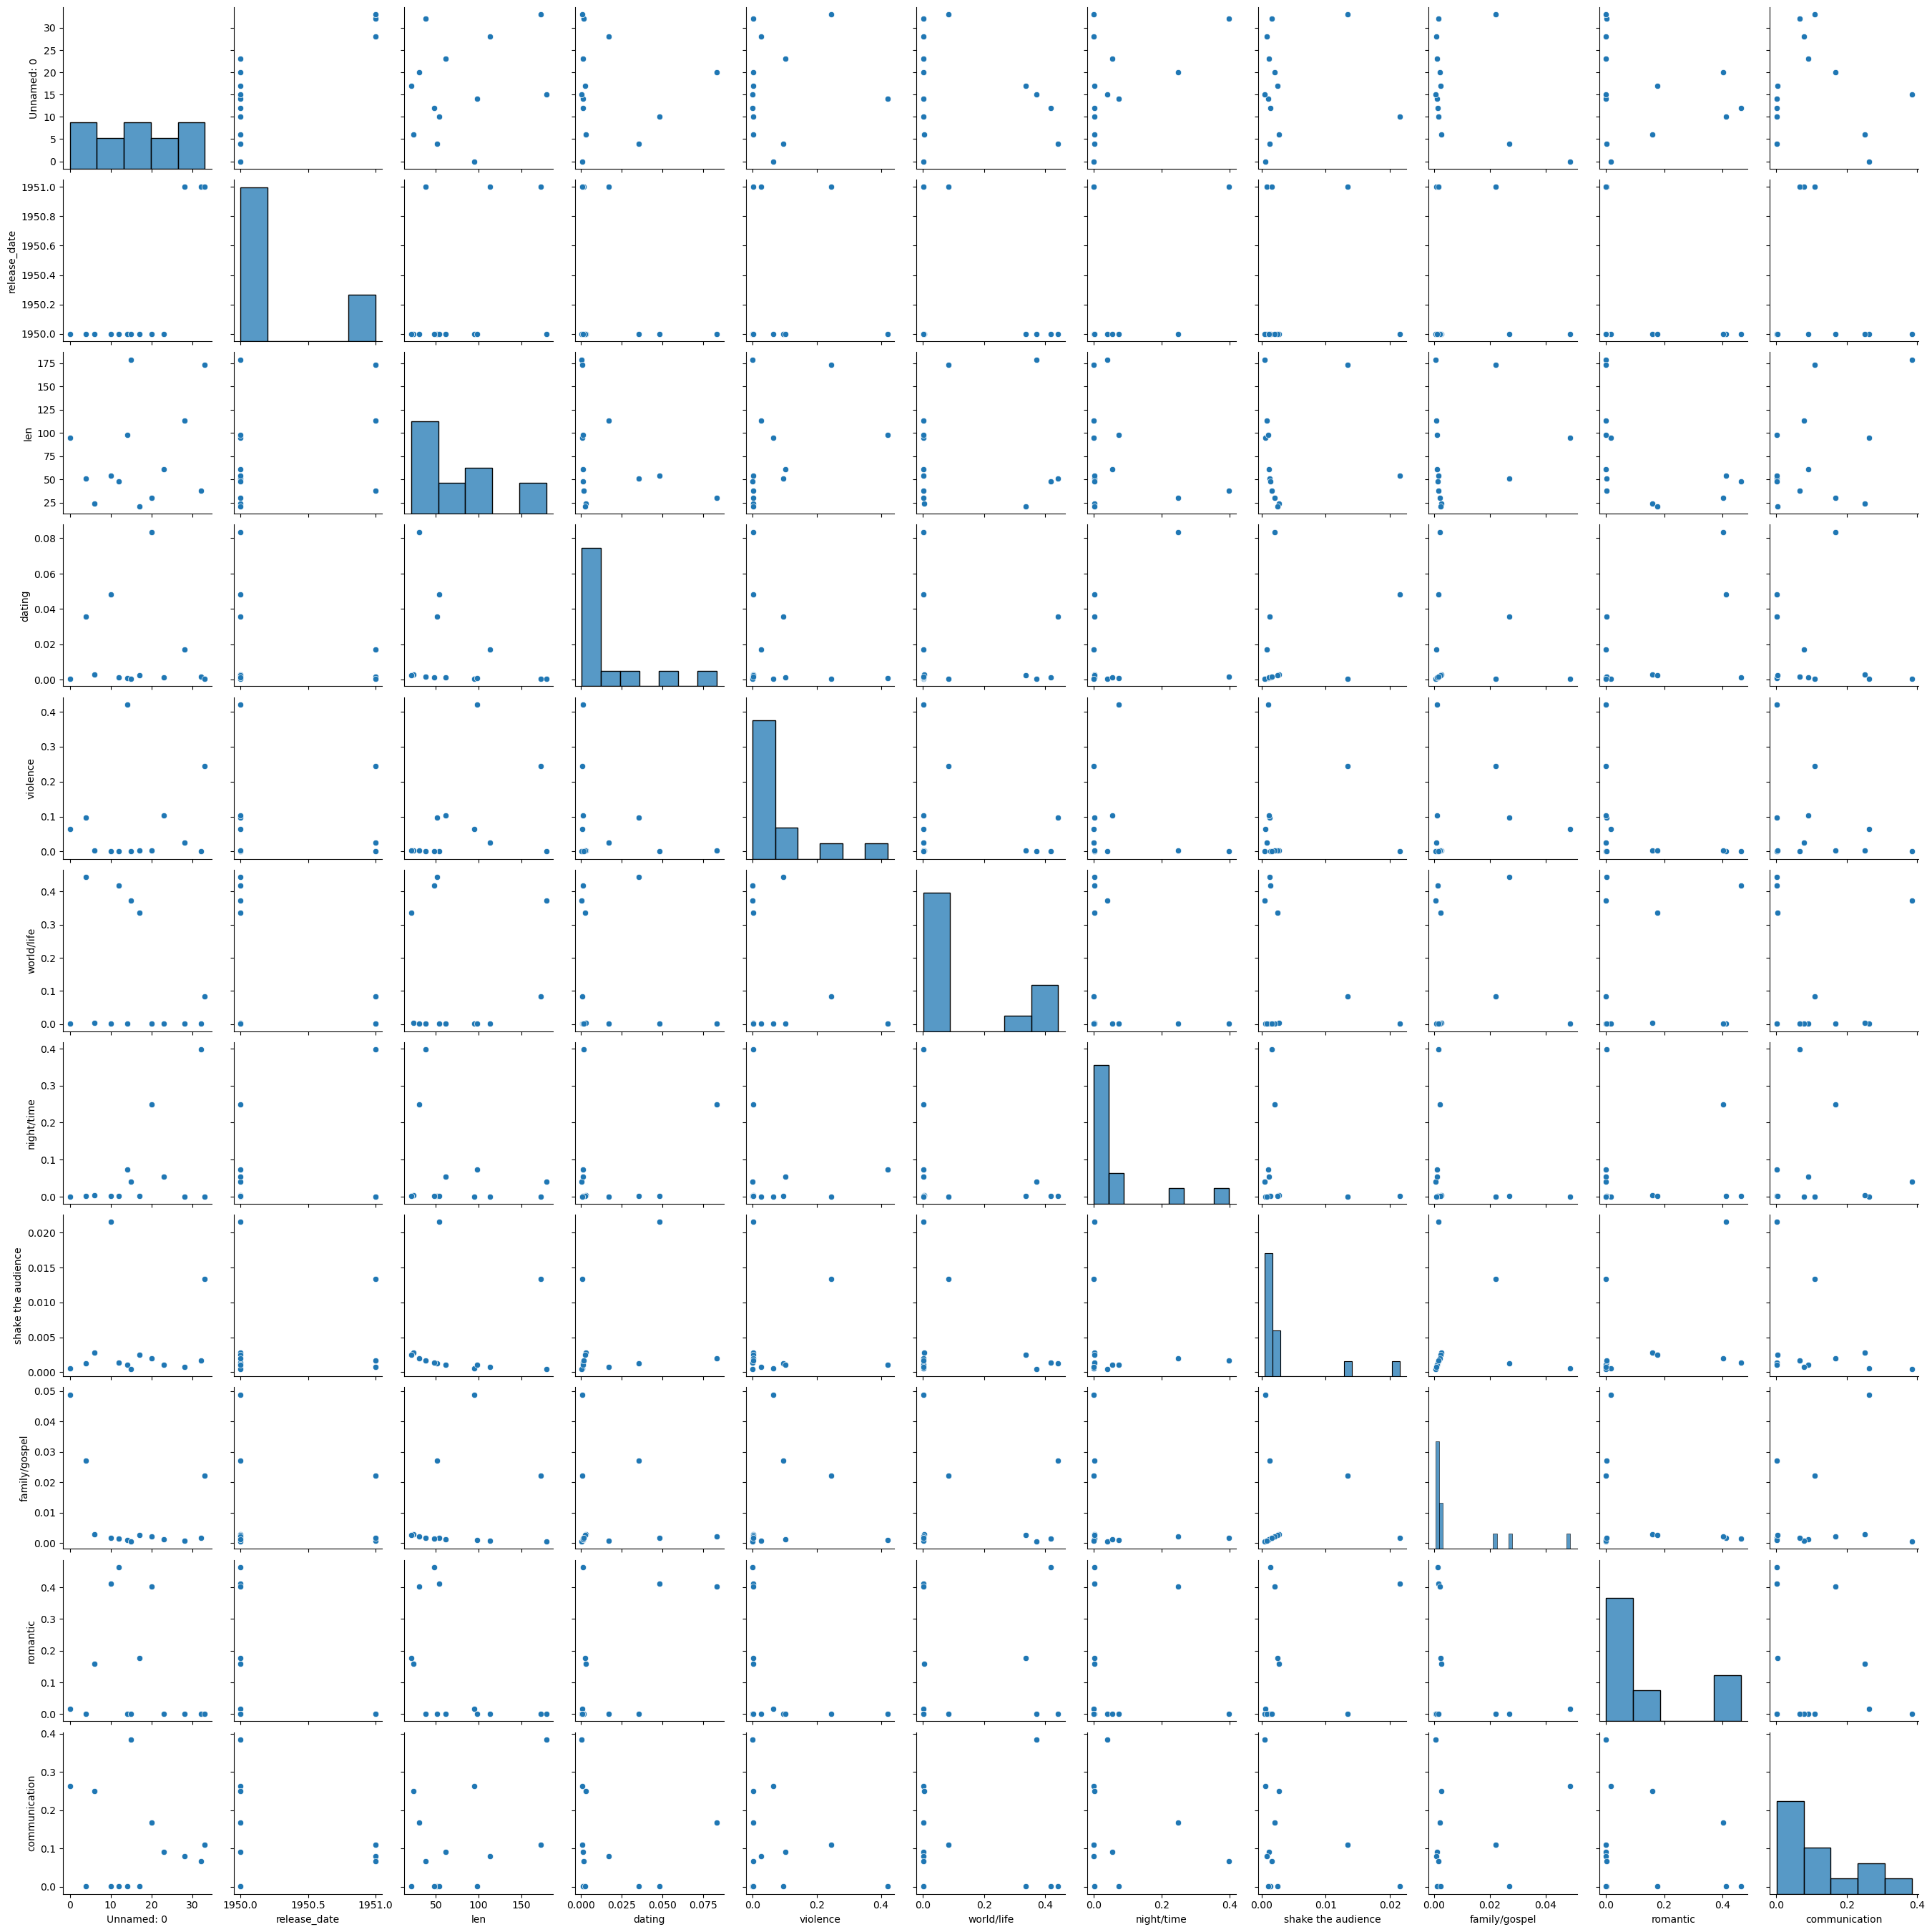

In [16]:
sns.pairplot(df.iloc[:13,:15])

/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


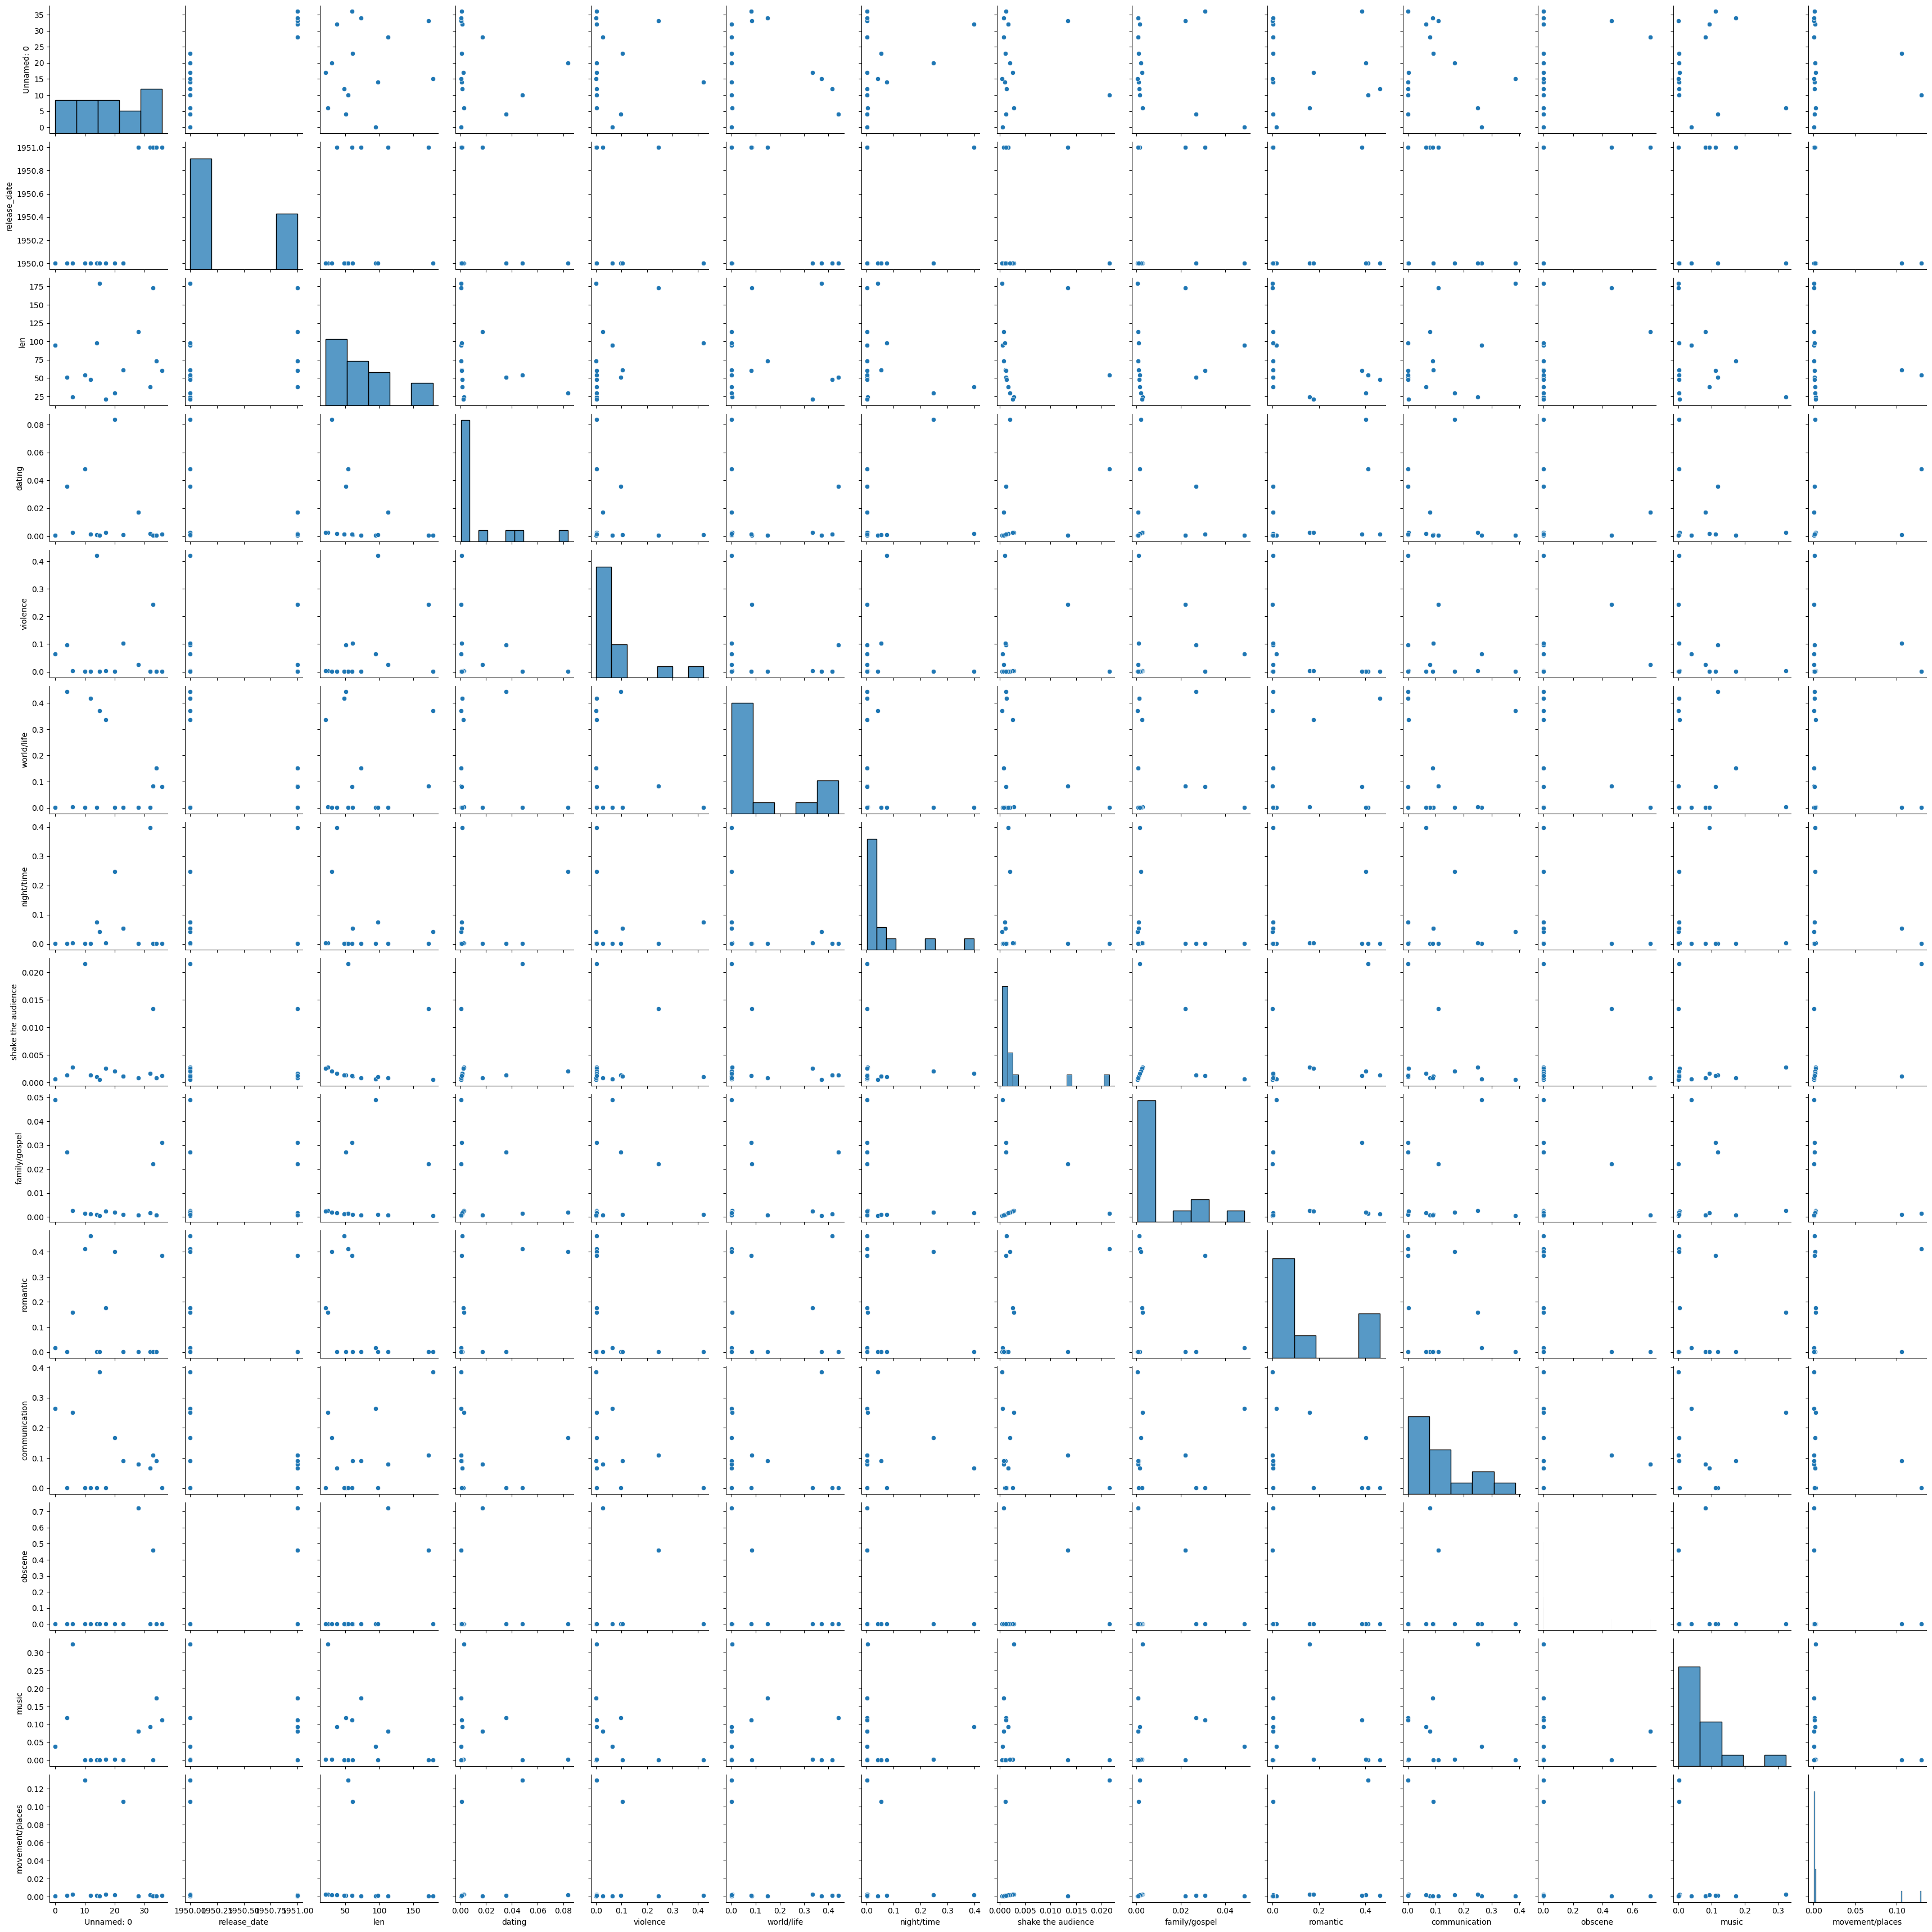

In [17]:
sns.pairplot(df.iloc[:15,:18])

/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


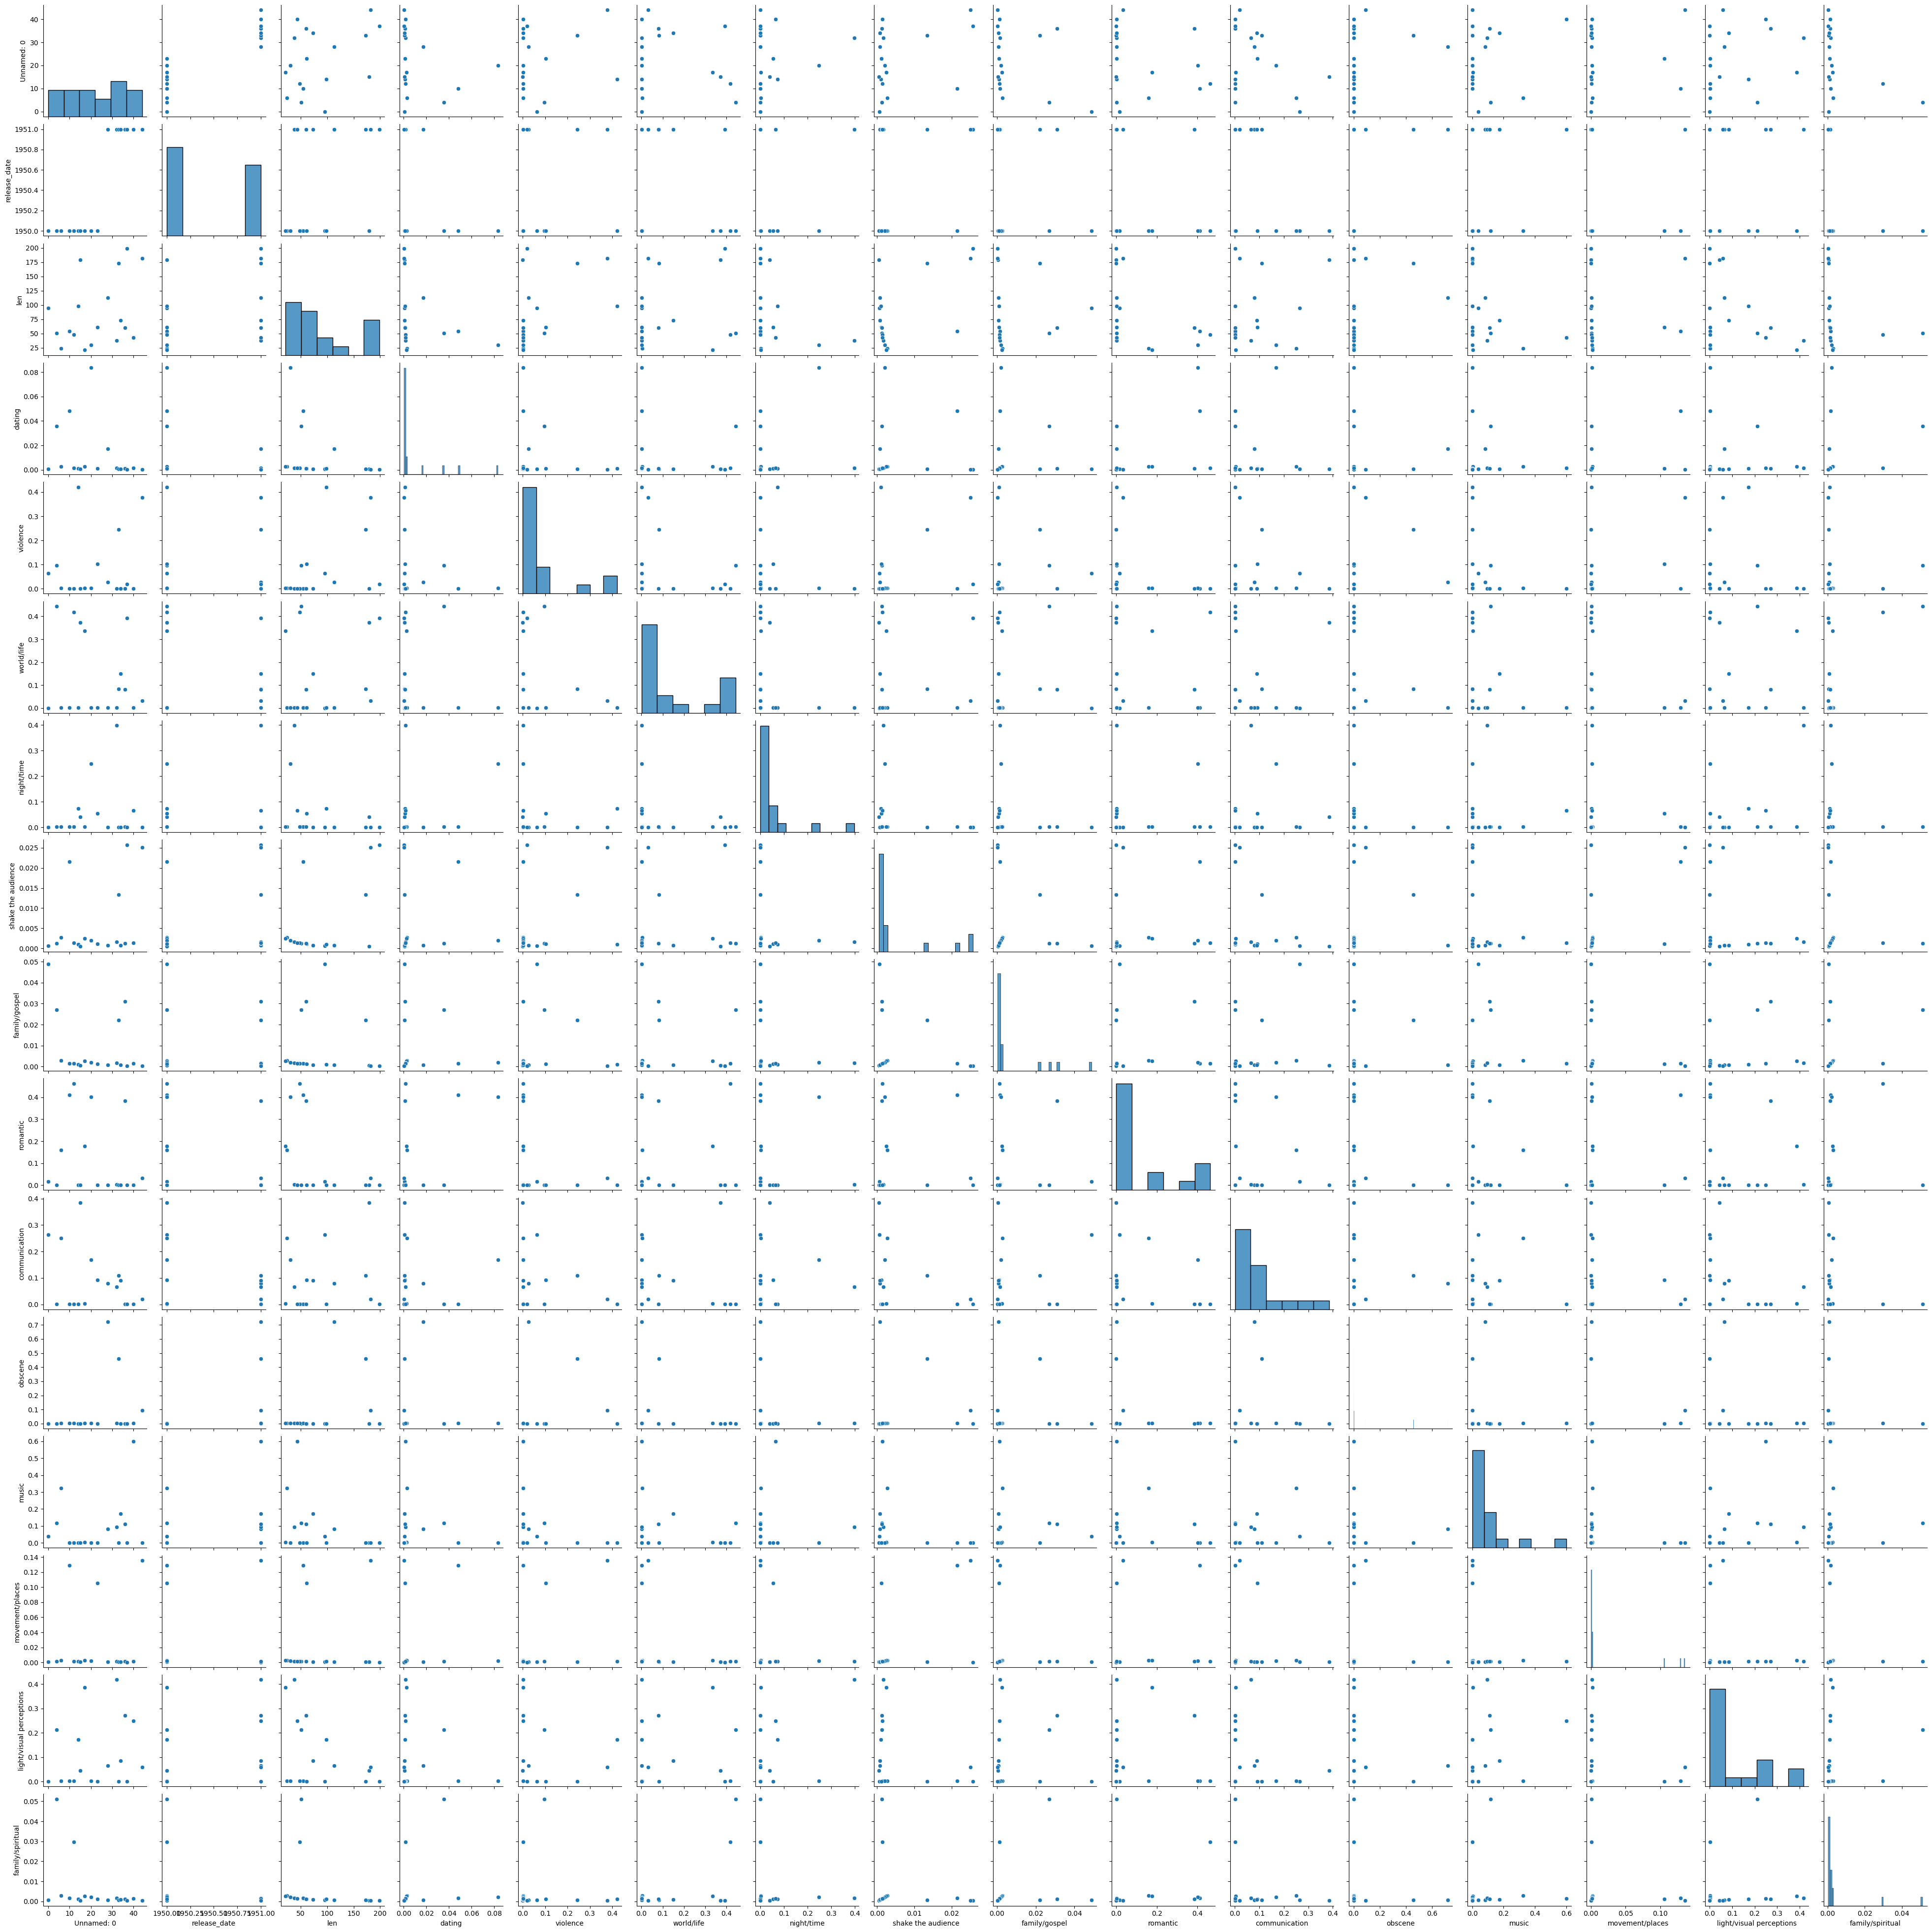

In [18]:
sns.pairplot(df.iloc[:18,:20])

/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


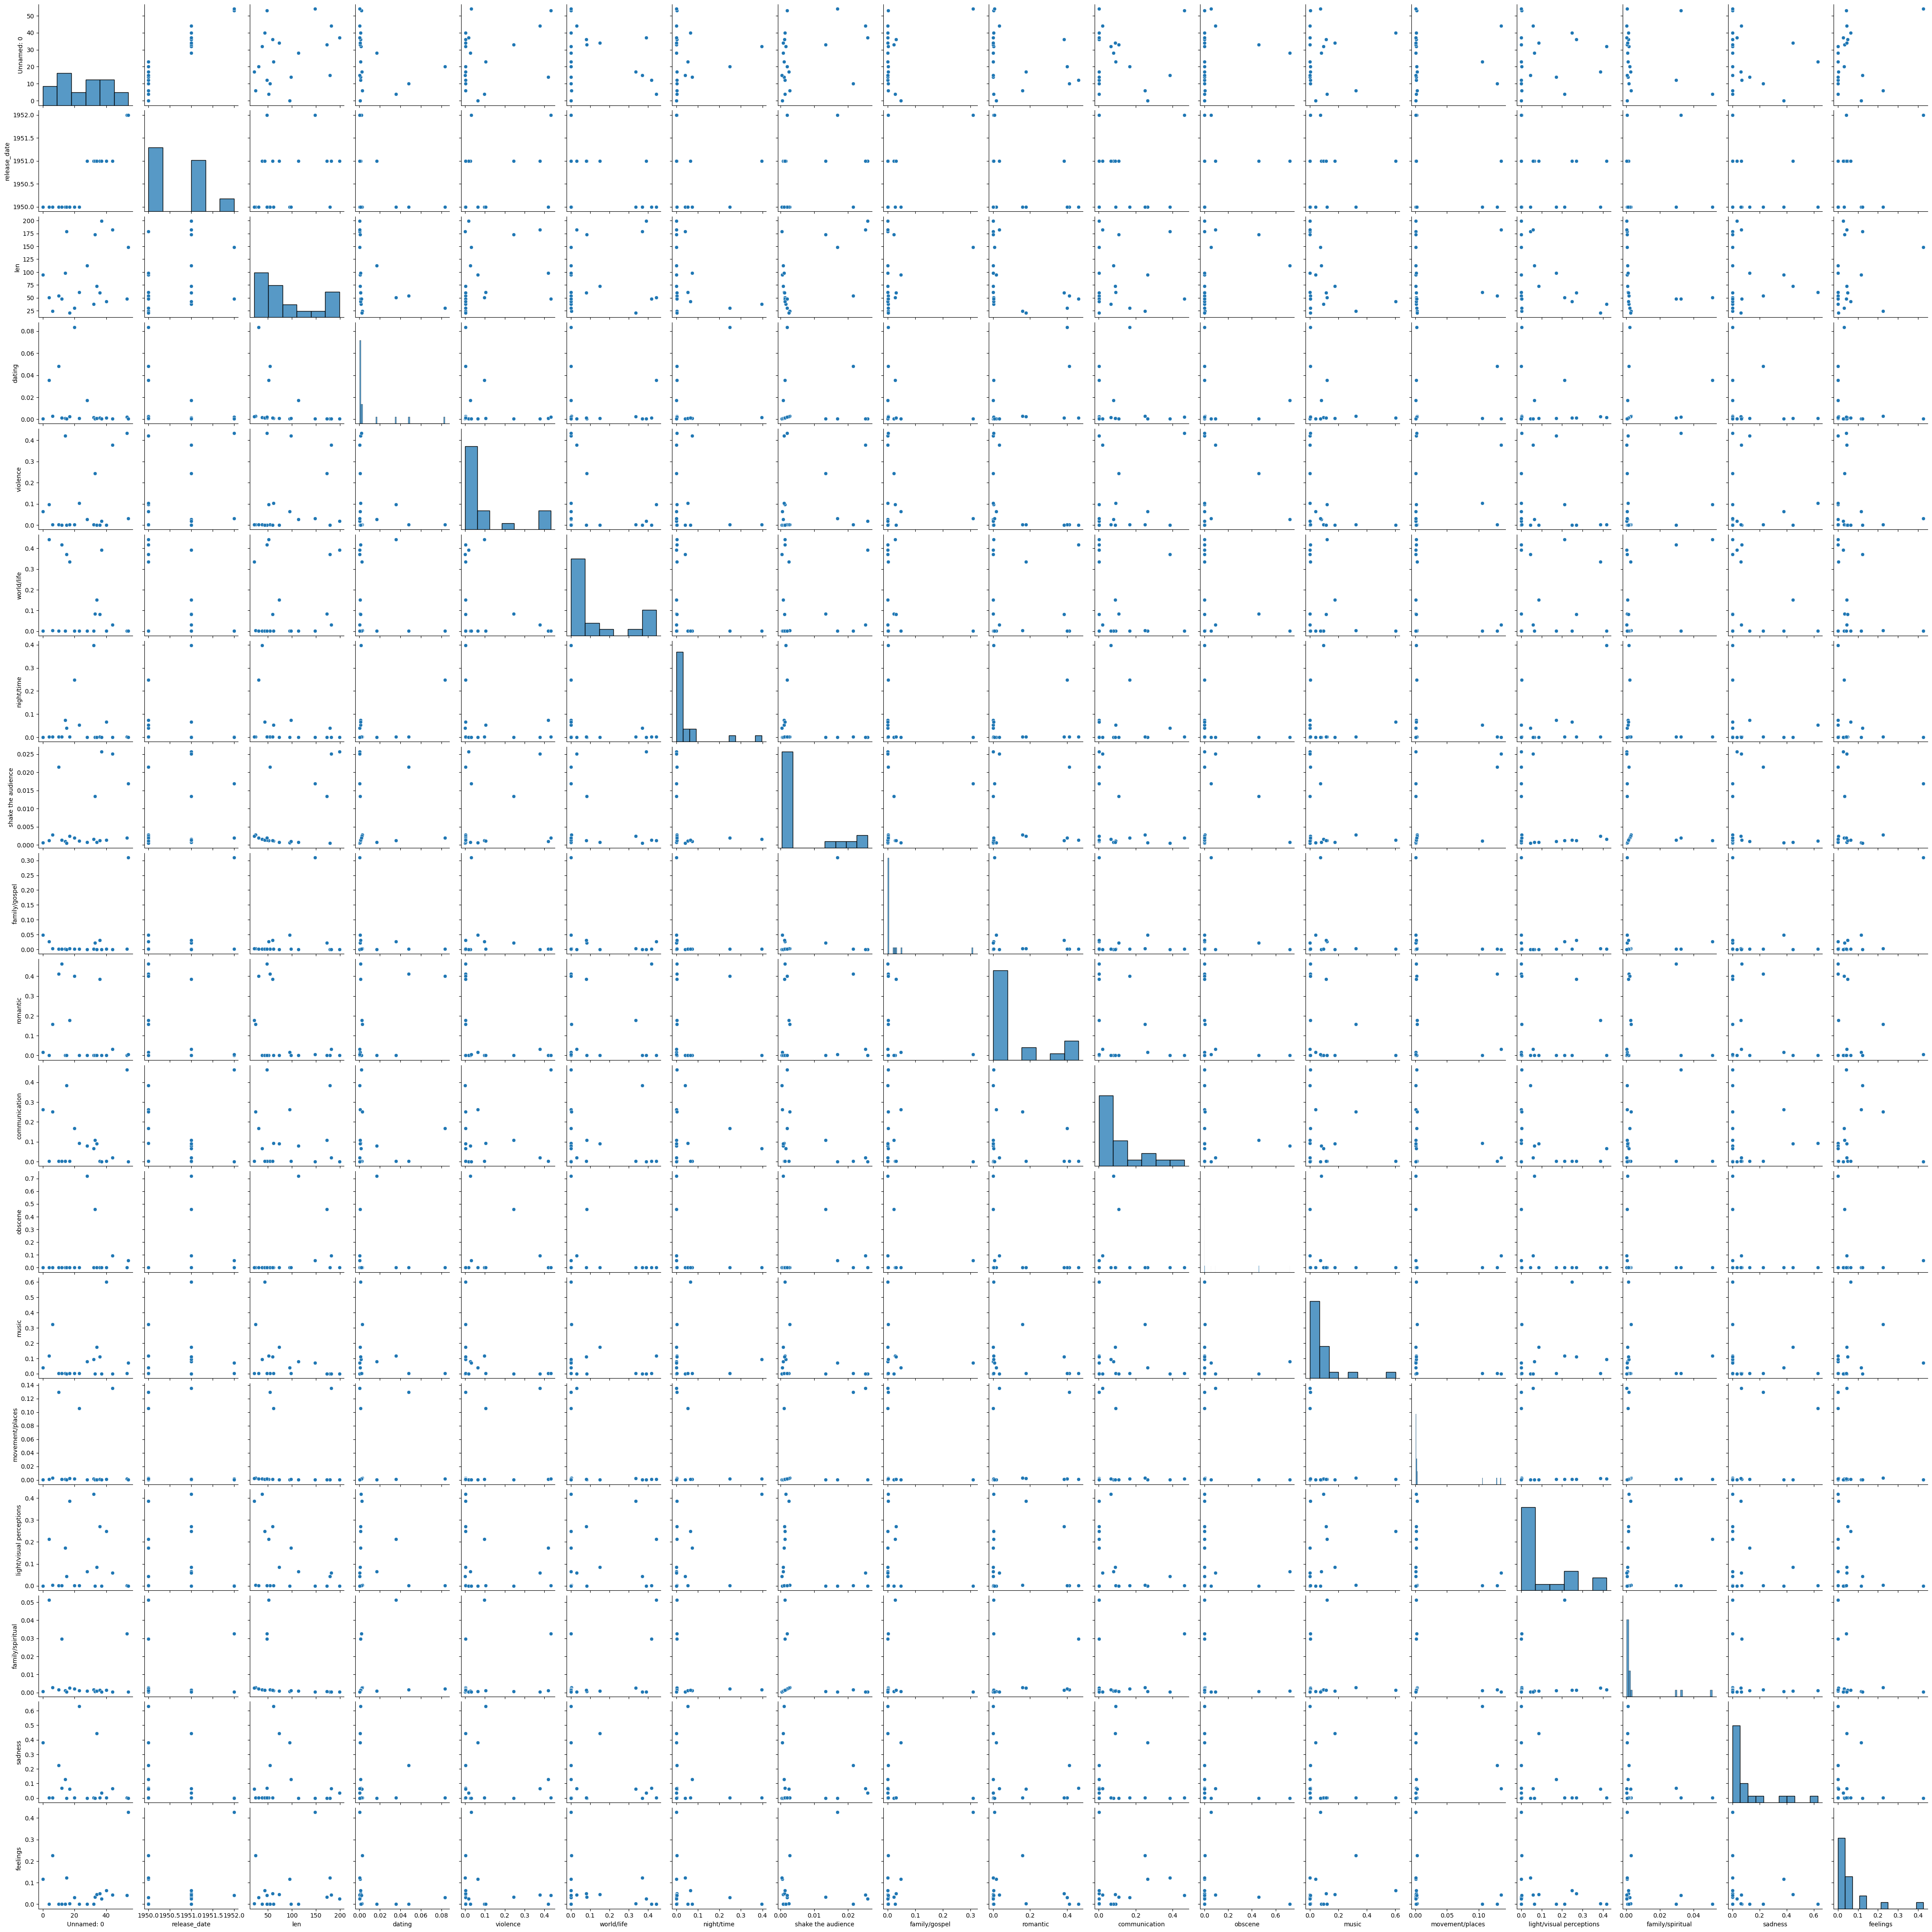

In [19]:
sns.pairplot(df.iloc[:20,:23])

/Users/oluwamayowa/anaconda3/envs/phase1/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


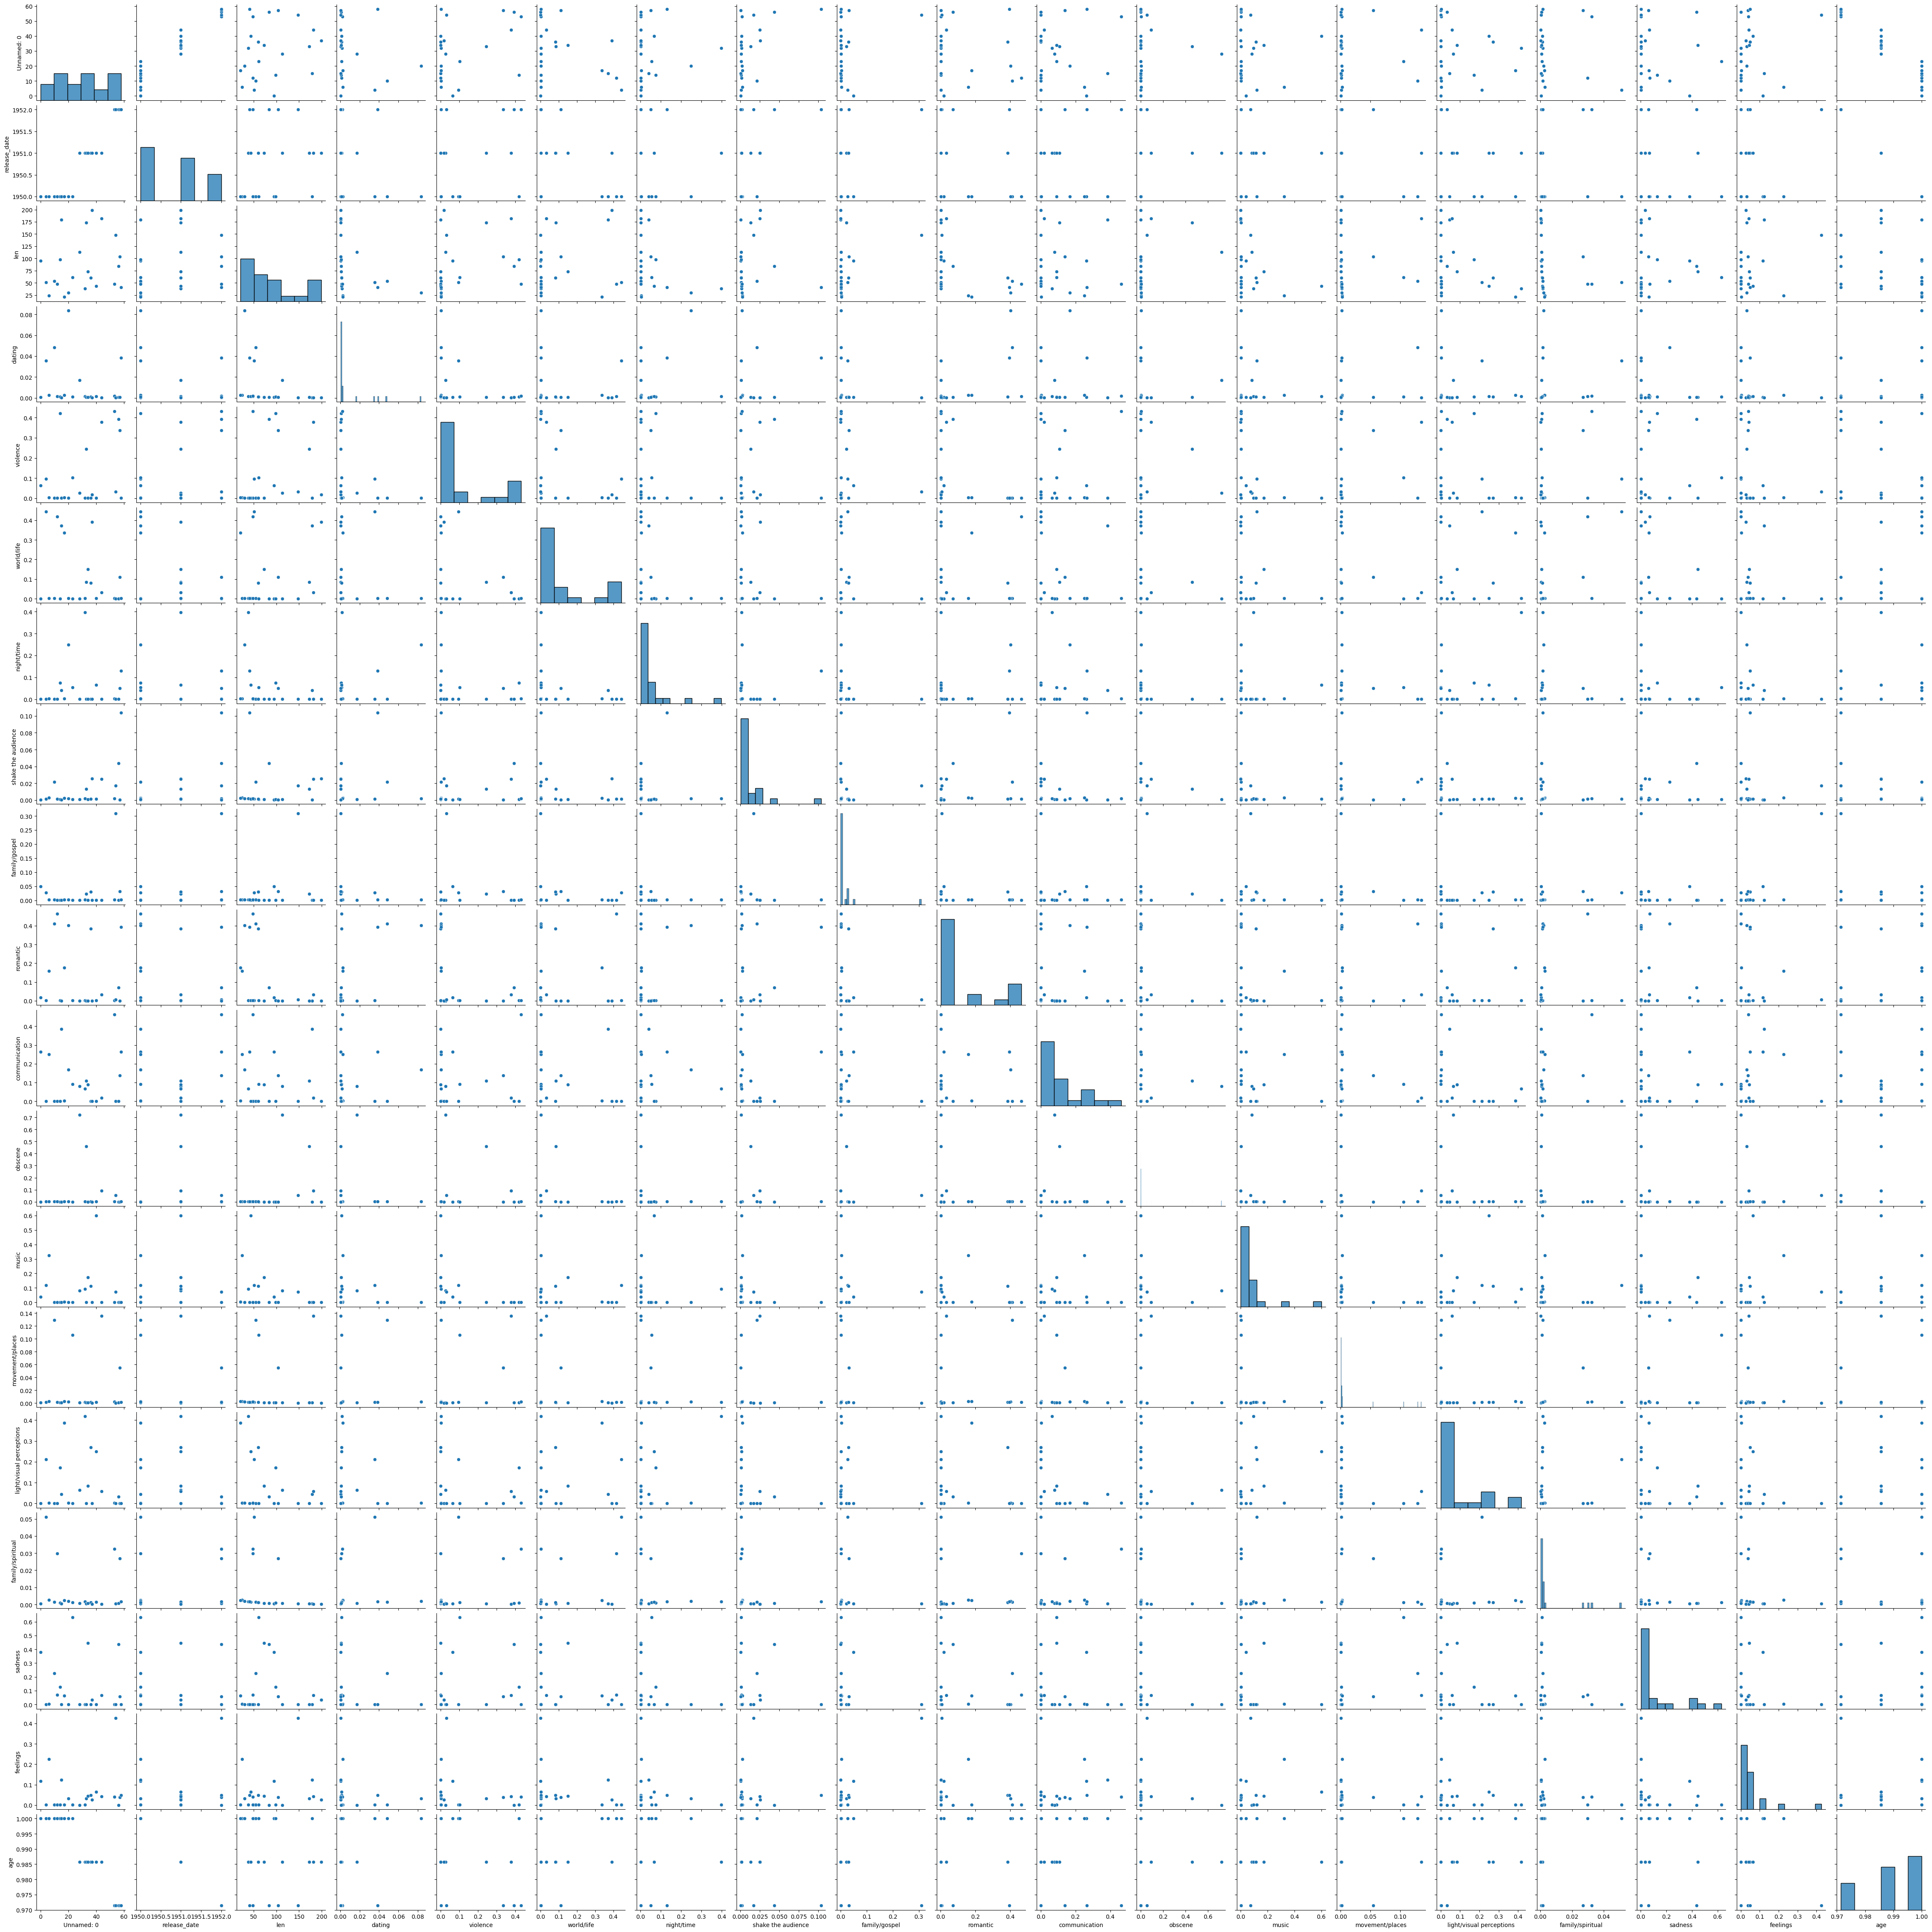

In [21]:
sns.pairplot(df.iloc[:23,:24])

0.4251478336216517

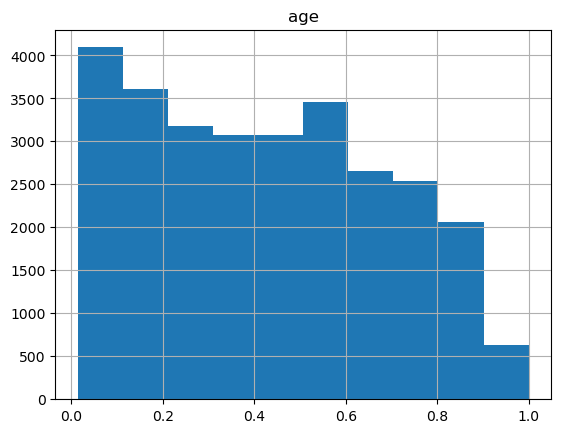

In [20]:
#plot histograms
df.hist(column = ["age"])
df["age"].mean()

The age column shows a right skewed (postive skewed) distribution. 0 indicates new song; 1 is old song. The majority of the songs are new.

0.12940157787834383

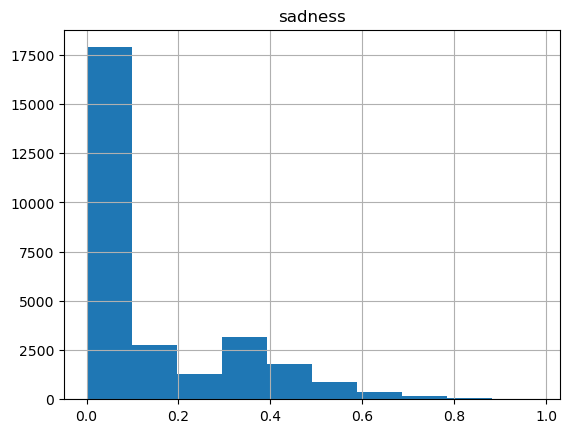

In [22]:
#plot histograms
df.hist(column = ["sadness"])
df["sadness"].mean()

The sadness column shows a right skewed (postive skewed) distribution with a mean of 6.1

73.03053381284818

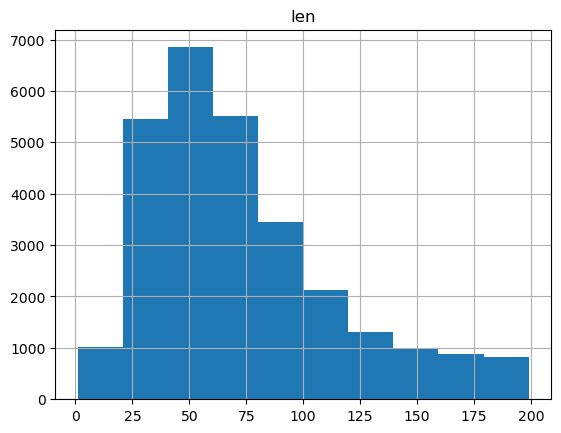

In [23]:
#plot histograms
df.hist(column = ["len"])
df["len"].mean()

The lenght column shows a right skewed (postive skewed) distribution almost normal with the average lenght at 73 seconds

0.11837119750375469

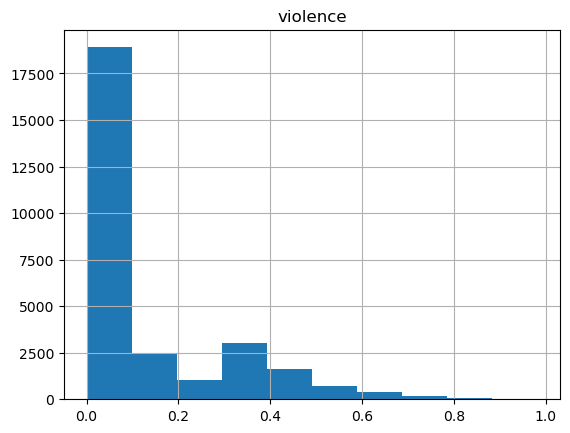

In [24]:
#plot histograms
df.hist(column = ["violence"])
df["violence"].mean()

The sadness column shows a right skewed (postive skewed) distribution with a mean of 0.12

1990.2396516465694

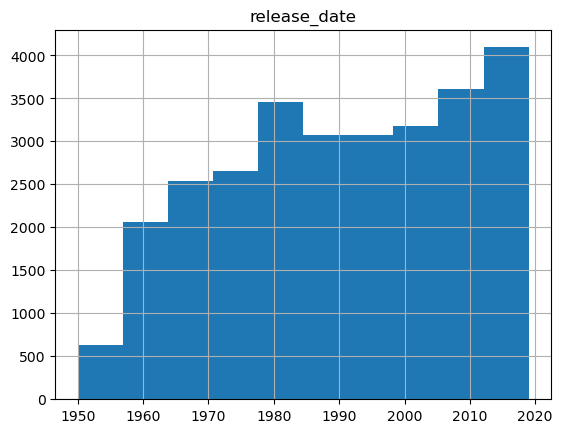

In [25]:
#plot histograms
df.hist(column = ["release_date"])
df["release_date"].mean()

The relase date of the songs are left skewed which means they are newer realses with an average of 1990.

<Axes: xlabel='genre', ylabel='violence'>

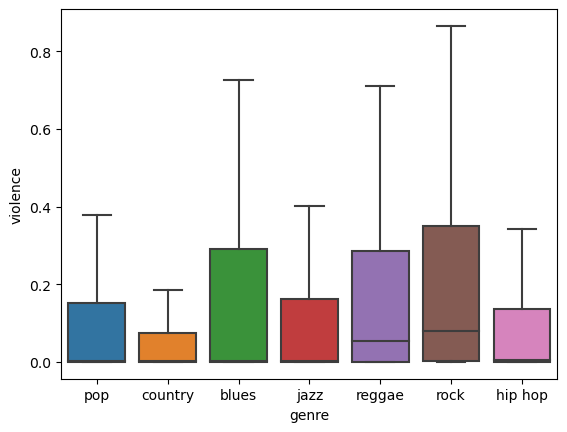

In [28]:
sns.boxplot(data=df, x="genre", y="violence", showfliers= False )

<Axes: xlabel='genre', ylabel='violence'>

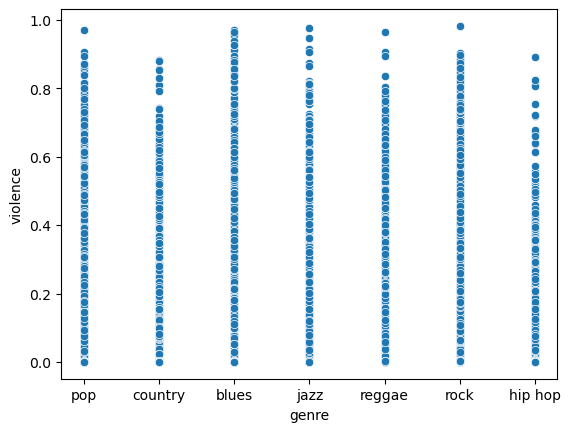

In [30]:
sns.scatterplot(data=df, x="genre", y="violence")

The most violent muusic genre is rock.

<Axes: xlabel='age', ylabel='violence'>

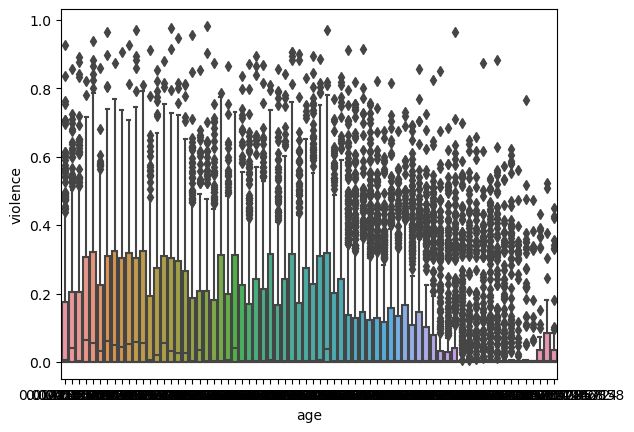

In [27]:
sns.boxplot(data=df, x="age", y="violence")

<Axes: xlabel='age', ylabel='violence'>

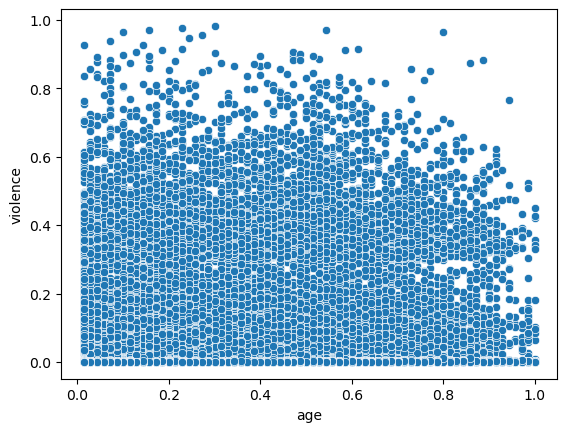

In [29]:
sns.scatterplot(data=df, x="age", y= "violence")

Violence in less prevalent in older music than in newer age music released today.

<Axes: xlabel='len', ylabel='violence'>

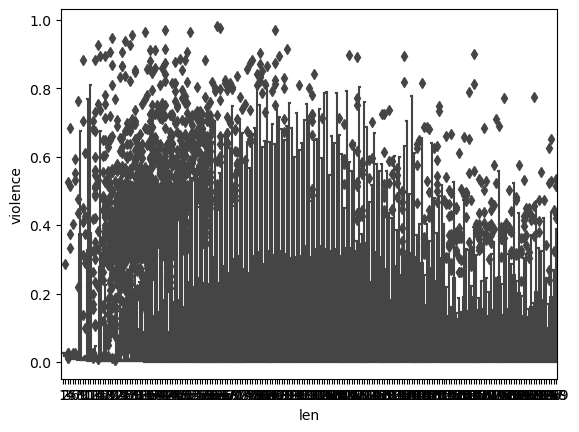

In [31]:
sns.boxplot(data=df, x="len", y="violence")

music that are shorter in lenght have more violence in them.

<Axes: xlabel='len', ylabel='violence'>

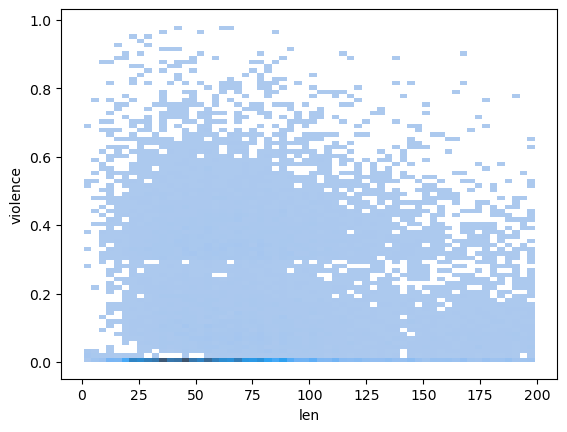

In [32]:
sns.histplot(data=df, x="len", y="violence")

<Axes: xlabel='age', ylabel='sadness'>

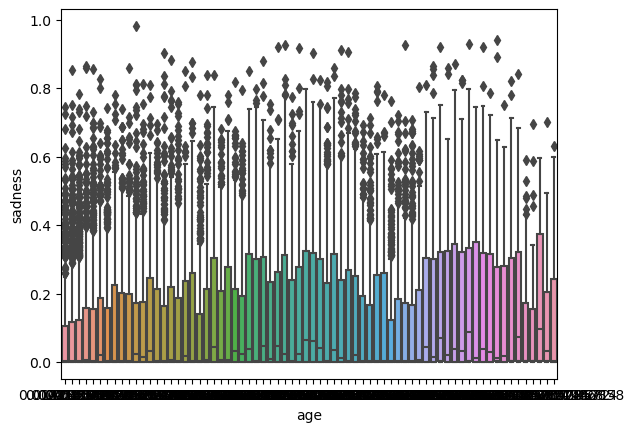

In [33]:
sns.boxplot(data=df, x="age", y="sadness")

Older people listen to songs that are sad.

<Axes: xlabel='age', ylabel='sadness'>

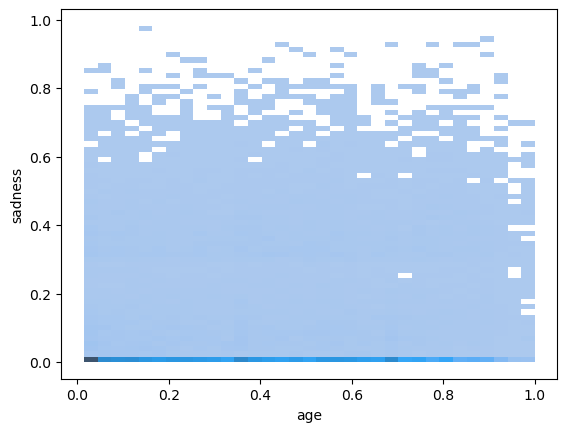

In [34]:
sns.histplot(data=df, x="age", y="sadness")

<Axes: xlabel='age', ylabel='family/gospel'>

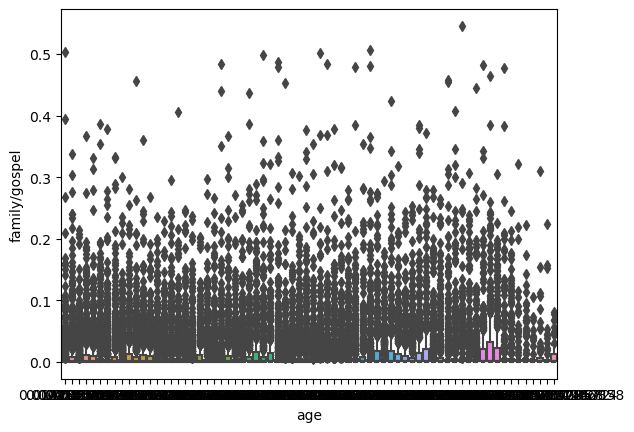

In [36]:
sns.boxplot(data=df, x="age", y="family/gospel")

Less younger people listen to spiritual music.

<Axes: xlabel='age', ylabel='family/spiritual'>

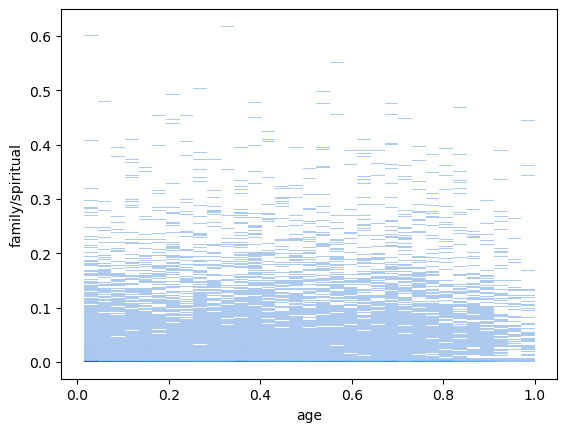

In [37]:
sns.histplot(data=df, x="age", y="family/spiritual")

**Data Cleaning**

In [38]:
df.isna()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28358,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28359,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28360,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
df.isna().sum()

Unnamed: 0                  0
artist_name                 0
track_name                  0
release_date                0
genre                       0
lyrics                      0
len                         0
dating                      0
violence                    0
world/life                  0
night/time                  0
shake the audience          0
family/gospel               0
romantic                    0
communication               0
obscene                     0
music                       0
movement/places             0
light/visual perceptions    0
family/spiritual            0
sadness                     0
feelings                    0
topic                       0
age                         0
dtype: int64